# dLGN-p RGC Match index (MI) analysis

General notes:
    - change histo color either via concrete color map or by changing cycler:
        from cycler import cycler
        mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

# Setup

In [1]:
## Import libraries
import os
import scipy.io as sio

# Data libs
import numpy as np
import pandas as pd

# Plotting libs
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib.gridspec as gridspec
%matplotlib inline


In [2]:
## Parameter setup
p = {}
p.update({
        # I/O parameters        
        'load_dir': '../../data/2P/proc/', # set load root directory
        'results_dir': '../../results/mi/', # results directory
        })

# Create results path
os.makedirs(os.path.dirname(p['results_dir']), exist_ok=True)

# Plot % Print parameters
rcParams['pdf.fonttype'] = 42 # Important for rendering text as text in .pdf savefig (otherwise path)

In [3]:
## Utils functions
# TODO: outsource to utils
def custom_plot_pars():
    """Returns custom plot parameters."""
    plot_pars = {
        'figure.facecolor': 'white',        
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.linewidth': 1.0,
        'axes.titlesize': 20,
        'figure.frameon': False,
   #         ‘figure.autolayout’: True
        'font.cursive': 'Arial',
        'font.serif': 'Arial',
        'font.sans-serif': 'Arial',
        'font.size': 15,
        'figure.figsize': [12.0, 4.0],
        'legend.frameon': False,
        'legend.fontsize': 15,
#         'mathtext.default': 'regular', # avoid DejaVu text formatting (DEFAULT: 'it')
        'pdf.fonttype': 42, # Important for rendering text as text in .pdf savefig
        'ps.fonttype': 3, # Important for rendering text as text in .eps savefig (DEFAULT: 3)
#         'ps.useafm': True,
#         'pdf.use14corefonts': True,
#         'text.usetex': True,
        'svg.fonttype': 'none', # Important for rendering text as text in .svg savefig
        'xtick.major.size': 6.5,
        'ytick.major.size': 6.5,
          }
    return plot_pars

def every_nth_ticklabel(ax, every_nth=2, xy_axis='xy'):
    """Shows only every nth ticklabel on specified axis object and axis dimension."""    
    
    if (xy_axis == 'x') or (xy_axis == 'xy'):
        for n, label in enumerate(ax.xaxis.get_ticklabels()):
#             pdb.set_trace()
            if label.get_text() == '': # this is to avoid invisible '' ticks before the first tick
                n += 1
            if n % every_nth != 0:
                label.set_visible(False)
    if (xy_axis == 'y') or (xy_axis == 'xy'):
        for n, label in enumerate(ax.yaxis.get_ticklabels()):
            if label.get_text() == '': # this is to avoid invisible '' ticks before the first tick
                n += 1
            if n % every_nth != 0:
                label.set_visible(False)

# Load data

In [4]:
# Load
g6 = pd.read_pickle(p['load_dir']+'g6_assigned.pkl') # gcamp6f data
o1 = sio.loadmat(p['load_dir']+'BadenEtAl_RGCs_2016_ogb1_clu_ogb1Kern_7.8Hz.mat') # ogb1 data

In [5]:
g6.head()

,chirpDeconvMean,chirpDeconvSd,chirpDeconvTraces,chirpMean,chirpMed,chirpQi,chirpSd,chirpTraces,date,field,...,barCorrSortIdx,chirpMaxCorrs,barMaxCorrs,mi,miSortIdxClu,maxMi,miTotCellSortIdx,cluIdx,groupIdx,groupID
0,"[0.182614715746, 0.116743502721, 0.28316401370...","[0.302011176476, 0.186499065661, 0.51234073060...","[[0.307347520304, -0.040183597133, 0.922208806...","[-0.0128713834029, -0.0701261534049, 0.0316880...","[-0.0055380478445, 0.00327161255789, 0.0046195...",0.211864,"[0.0893408663753, 0.133742229913, 0.1877135966...","[[-0.0055380478445, -0.173031743708, 0.2079987...",20160421,02,...,"[5, 4, 3, 2, 12, 11, 1, 6, 7, 46, 0, 19, 8, 14...",0.319494,0.814407,"[0.544409792573, 0.570233410581, 0.57334394738...","[5, 4, 3, 12, 2, 1, 11, 0, 6, 7, 46, 8, 19, 9,...",0.648228,102,5,4,OFF alpha sust.
1,"[0.395936570383, 0.484333335227, 0.36619875319...","[0.461526717202, 0.392324339998, 0.24295881311...","[[-0.0427311664374, 0.297276886923, 0.28766548...","[-0.0783298482677, 0.0479358267538, -0.0064009...","[-0.277485269658, -0.0353581361838, 0.05130186...",0.227458,"[0.313383878213, 0.282260583339, 0.26402579560...","[[-0.428683834757, 0.27982536097, 0.5339159519...",20160421,05,...,"[24, 25, 21, 20, 26, 22, 27, 39, 13, 28, 29, 3...",0.099745,0.598358,"[-0.0576079147626, -0.0408989654682, -0.111038...","[21, 25, 24, 26, 27, 20, 22, 28, 39, 29, 13, 3...",0.468846,199,21,15,ON DS trans.
2,"[0.122236683075, 0.0945549007402, 0.0808013954...","[0.0608752624143, 0.0557781937903, 0.037605802...","[[0.0896329891682, 0.12281087181, 0.0762538680...","[0.0283608752041, 0.0193459166529, 0.007544470...","[0.00577323761667, 0.01094808481, 0.0114910636...",0.456170,"[0.0481080506676, 0.026399595447, 0.0327665772...","[[0.00577323761667, 0.0387059296714, 0.0114910...",20160421,05,...,"[9, 10, 19, 15, 14, 0, 16, 8, 11, 12, 1, 17, 6...",0.684494,0.901579,"[0.768176586964, 0.772951552187, 0.63106760070...","[1, 0, 9, 12, 10, 19, 11, 16, 14, 15, 17, 8, 2...",0.772952,27,1,1,OFF DS
3,"[0.242954470837, 0.267869409971, 0.26737713004...","[0.379771023111, 0.268041602557, 0.42118392915...","[[0.875277398854, 0.0720089240492, -0.12034829...","[-0.284194529373, -0.289431515546, -0.29011844...","[0.00378478493363, -0.113673823443, -0.2722623...",0.440871,"[0.739194895605, 0.3732969897, 0.276251460654,...","[[0.328532088453, -0.113673823443, -0.42387452...",20160421,05,...,"[47, 48, 46, 5, 3, 4, 7, 38, 6, 2, 37, 27, 28,...",0.611384,0.820837,"[-0.488613757645, -0.509158046369, -0.31544263...","[47, 48, 46, 5, 3, 45, 38, 4, 2, 42, 37, 41, 4...",0.741118,39,47,31,OFF suppr. 2
4,"[0.511943758297, 0.30111678947, 0.421022640162...","[0.330802736146, 0.153093080913, 0.19764728626...","[[0.613555646733, 0.599308152433, 0.4597155645...","[0.16869152162, 0.0250442959601, 0.11692367081...","[0.262316657829, -0.0569183318512, 0.207522724...",0.414688,"[0.411126253043, 0.31175320296, 0.224346218133...","[[0.36056425394, 0.506663426594, 0.44693488025...",20160421,05,...,"[25, 27, 26, 24, 28, 20, 21, 22, 29, 39, 23, 3...",0.479891,0.823743,"[-0.322148719009, -0.247481528969, -0.30262894...","[25, 27, 26, 28, 20, 24, 22, 21, 29, 39, 34, 1...",0.704824,66,25,17,ON trans.


# MI shuffle distribution

In [6]:
def shuffle_mi(data_frame, k=1):
    """def shuffle_mi(data, k):
    Takes k random match indices (MI) from array of cells and their MIs to each cluster.
    Arguments:
        data_frame : data frame containing MIs of each cell to each cluster
        k : number of repetitions [DEFAULT: 1]
    Returns:
        2D-array of MIs
    """
    data = data_frame.mi.values.tolist()
    
    # Go through each cell in data and pick k random MI entries
    mi_shuffled = np.array([i[np.random.randint(0, len(i), size=k)].tolist() for i in data])
    
    return mi_shuffled

In [7]:
# Create shuffled MI data
n_reps = 10000 # Number of repetitions
mi_shuffled = shuffle_mi(g6, k=n_reps)

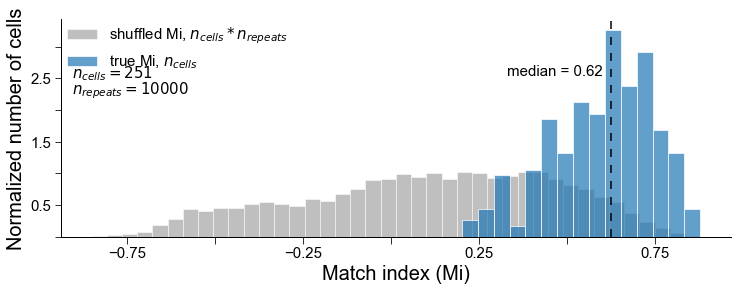

In [8]:
## Plot maxMI vs. shuffled MIs

# Plot pars
plot_pars = custom_plot_pars()
            
rcParams.update(plot_pars)
fig, ax = plt.subplots()

# Plot histograms
ax.hist(mi_shuffled.flatten(), bins=40, alpha=0.5, normed=True, color='grey', edgecolor='white', 
         label='shuffled Mi, $n_{cells} * n_{repeats}$') # shuffled MIs
ax.hist(g6.maxMi, bins=15, alpha=0.7, normed=True, edgecolor='white', label='true Mi, $n_{cells}$') # true MIs

# Plot median maxMi
ax.axvline(x=np.median(g6.maxMi), c='k', alpha=1, ls='--', dashes=(4, 4), linewidth=1.5) 
ax.text(np.median(g6.maxMi), 2.5, 'median = %.2f  '%np.median(g6.maxMi), horizontalalignment='right', verticalalignment='bottom')

# Plot adjustments
plt.xlabel('Match index (Mi)', axes=ax, fontsize=rcParams['axes.titlesize'])
plt.ylabel('Normalized number of cells', axes=ax, fontsize=rcParams['axes.titlesize'])
plt.text(ax.get_xlim()[0]+0.03, 2.5, '$n_{cells} = %i$'%len(g6.maxMi))
plt.text(ax.get_xlim()[0]+0.03, 2.25, '$n_{repeats} = %i$'%n_reps)
lh = plt.legend(borderaxespad=0)
every_nth_ticklabel(ax, every_nth=2) # Reduce number of ticks

# plt.show()

# Save figure
# plt.savefig(p['results_dir']+'mi_shuffled'+'.png', dpi=300)

In [9]:
from scipy import stats
stats.percentileofscore(mi_shuffled.flatten(), np.median(g6.maxMi))

94.503446215139448

# MI - compare MIs for 1st, 2nd, n-best-matching cluster

## MI comparison: plot difference of best to median of shuffled data

flip values

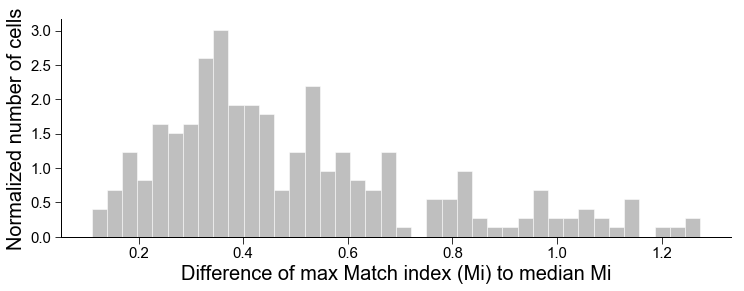

In [19]:
## Plot maxMI vs. median MIs

# Plot pars
plot_pars = custom_plot_pars()
            
rcParams.update(plot_pars)
fig, ax = plt.subplots()

# Get max Mis
max_mis = np.array(g6['maxMi'].values.tolist())
# Get median Mi
mi_median = np.median(np.array(g6['mi'].values.tolist()),axis=1)
# Get difference
diff = max_mis - mi_median

# Plot histograms
ax.hist(diff, bins=40, alpha=0.5, normed=True, color='grey', edgecolor='white')

# Plot adjustments
plt.xlabel('Difference of max Match index (Mi) to median Mi', axes=ax, fontsize=rcParams['axes.titlesize'])
plt.ylabel('Normalized number of cells', axes=ax, fontsize=rcParams['axes.titlesize'])

plt.show()

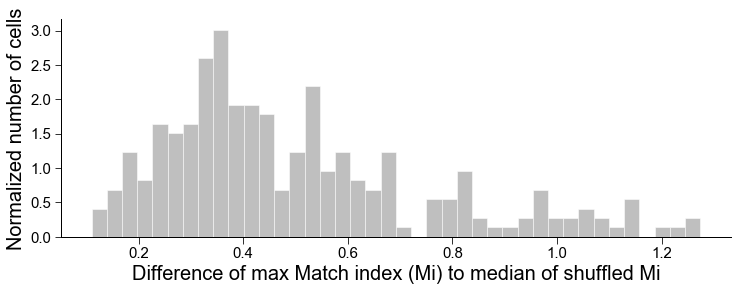

In [10]:
## Plot maxMI vs. median *shuffled* MIs

# Plot pars
plot_pars = custom_plot_pars()
            
rcParams.update(plot_pars)
fig, ax = plt.subplots()

# Get max Mis
max_mis = np.array(g6['maxMi'].values.tolist())
# Get median shuffled Mi
mi_shuffled_median = np.median(mi_shuffled, axis=1)
# Get difference
diff = max_mis - mi_shuffled_median

# Plot histograms
ax.hist(diff, bins=40, alpha=0.5, normed=True, color='grey', edgecolor='white')

# Plot adjustments
plt.xlabel('Difference of max Match index (Mi) to median of shuffled Mi', axes=ax, fontsize=rcParams['axes.titlesize'])
plt.ylabel('Normalized number of cells', axes=ax, fontsize=rcParams['axes.titlesize'])

plt.show()

## MI comparison: simply plot distributions of n clusters

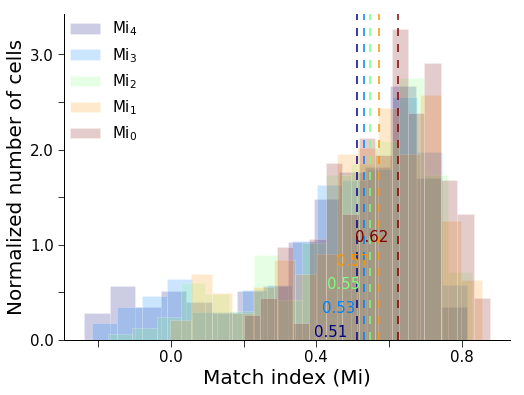

In [11]:
## Plot maxMI 2nd, 3rd nth cluster histogram

clus = range(5)#[0,3,6,9,12] # Clusters to compare

# Plot pars
plot_pars = custom_plot_pars()
# plt.set_cmap('viridis') #cmap=plt.get_cmap('viridis')
cmap = plt.cm.jet(np.linspace(0, 1, len(clus)), alpha=1) # Create actual [n, 4] array of colors

rcParams.update(plot_pars)
fig, ax = plt.subplots()


# Plot histograms
for i,val in enumerate(clus[::-1]):
    # Find ith Mi for all cells
    mis = np.array(g6['mi'].values.tolist())\
        [np.arange(len(g6)), np.array(g6['miSortIdxClu'].values.tolist())[:,val]]
    
    # Plot histogram
    hh = ax.hist(mis, bins=15, alpha=0.2, normed=True, color=cmap[i], edgecolor='white', label='Mi$_{%i}$'%val) # true MIs

    # Plot median maxMi
    ax.axvline(x=np.median(mis), c=cmap[i], alpha=1, ls='--', dashes=(4, 4), linewidth=1.5) 
    ax.text(np.median(mis), 0.25*i, '%.2f  '%np.median(mis), color=cmap[i], horizontalalignment='right', verticalalignment='bottom')

# Plot adustments
plt.xlabel('Match index (Mi)', axes=ax, fontsize=rcParams['axes.titlesize'])
plt.ylabel('Normalized number of cells', axes=ax, fontsize=rcParams['axes.titlesize'])
lh = plt.legend(borderaxespad=0)
every_nth_ticklabel(ax, every_nth=2) # Reduce number of ticks
    

## MI comparison: plot difference of best to 2nd, 3rd, nth cluster

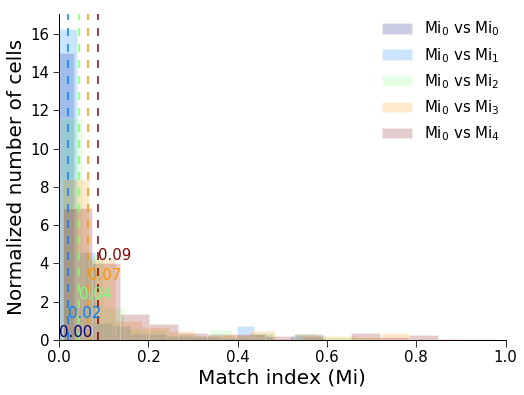

In [12]:
## Plot maxMI 2nd, 3rd nth cluster histogram

clus = range(5) # Clusters to compare

# Plot pars
plot_pars = custom_plot_pars()
# plt.set_cmap('viridis') #cmap=plt.get_cmap('viridis')
cmap = plt.cm.jet(np.linspace(0, 1, len(clus)), alpha=1) # Create actual [n, 4] array of colors

rcParams.update(plot_pars)
fig, ax = plt.subplots()

# Get max Mis
max_mis = np.array(g6['mi'].values.tolist())\
    [np.arange(len(g6)), np.array(g6['miSortIdxClu'].values.tolist())[:,0]]

# Plot histograms
for i,val in enumerate(clus):
    # Get ith Mi for all cells
    mis = np.array(g6['mi'].values.tolist())\
        [np.arange(len(g6)), np.array(g6['miSortIdxClu'].values.tolist())[:,val]]
    
    # Get difference from max Mi
    mi_diffs = max_mis - mis
    
    # Plot histogram
    hh = ax.hist(mi_diffs, bins=15, alpha=0.2, normed=True, color=cmap[i], edgecolor='white', label='Mi$_{0}$ vs Mi$_{%i}$'%val) # true MIs

    # Plot median Mi differences
    ax.axvline(x=np.median(mi_diffs), c=cmap[i], alpha=1, ls='--', dashes=(4, 4), linewidth=1.5) 
    ax.text(np.median(mi_diffs), i, '%.2f  '%np.median(mi_diffs), color=cmap[i], horizontalalignment='left', verticalalignment='bottom')

# Plot adustments
plt.xlabel('Match index (Mi)', axes=ax, fontsize=rcParams['axes.titlesize'])
plt.ylabel('Normalized number of cells', axes=ax, fontsize=rcParams['axes.titlesize'])
plt.xlim([0,1])

lh = plt.legend(borderaxespad=0)
    

## MI comparison: plot cell with large distance between best-matching and subsequent clusters

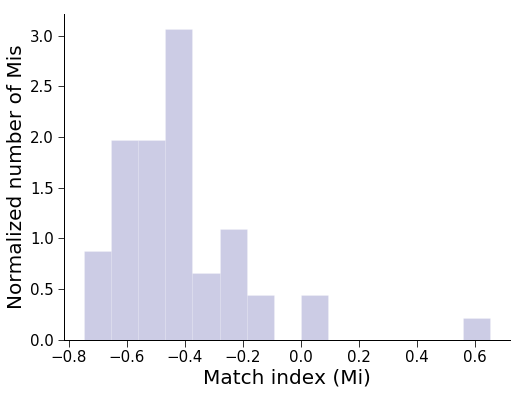

In [13]:
## OLD
## Plot cell with large distance between best-matching and subsequent clusters

clus = [1] # Clusters to compare maxMi cluster with (1 = 2nd best)

# Plot pars
plot_pars = custom_plot_pars()
# plt.set_cmap('viridis') #cmap=plt.get_cmap('viridis')
cmap = plt.cm.jet(np.linspace(0, 1, len(clus)), alpha=1) # Create actual [n, 4] array of colors

rcParams.update(plot_pars)
fig, ax = plt.subplots()

# Get max Mis
max_mis = np.array(g6['maxMi'].values.tolist())

# Plot histograms
for i,val in enumerate(clus):
    # Get ith Mi for all cells
    mis = np.array(g6['mi'].values.tolist())\
        [np.arange(len(g6)), np.array(g6['miSortIdxClu'].values.tolist())[:,val]]
    
    # Get differences from max Mi
    mi_diffs = max_mis - mis
    # Find cell with max Mi difference between maxMi vs 2nd Mi
    max_mi_diff_idx = np.where(mi_diffs == np.max(mi_diffs))
    
    # Plot histogram for cell with max
    hh = ax.hist(np.squeeze(np.array(g6.mi.values.tolist())[max_mi_diff_idx,:]),
                 bins=15, alpha=0.2, normed=True, color=cmap[i], edgecolor='white')#, label='Mi$_{0}$ vs Mi$_{%i}$'%val)

#     # Plot median Mi differences
#     ax.axvline(x=np.median(mi_diffs), c=cmap[i], alpha=1, ls='--', dashes=(4, 4), linewidth=1.5) 
#     ax.text(np.median(mi_diffs), i, '%.2f  '%np.median(mi_diffs), color=cmap[i], horizontalalignment='left', verticalalignment='bottom')

# Plot adustments
plt.xlabel('Match index (Mi)', axes=ax, fontsize=rcParams['axes.titlesize'])
plt.ylabel('Normalized number of Mis', axes=ax, fontsize=rcParams['axes.titlesize'])


# lh = plt.legend(borderaxespad=0)
# every_nth_ticklabel(ax, every_nth=2) # Reduce number of ticks
    

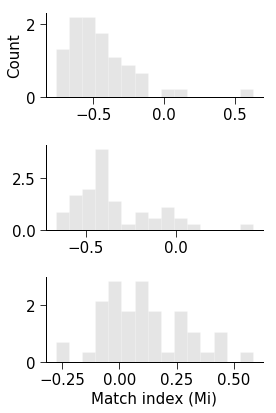

In [122]:
# Get max Mis for all cells
max_mis = np.array(g6['maxMi'].values.tolist())

# Get Mi to compare maxMi cluster with (1 = 2nd best)
nth_mi = 1
mis = np.array(g6['mi'].values.tolist())\
    [np.arange(len(g6)), np.array(g6['miSortIdxClu'].values.tolist())[:,nth_mi]]

# Get difference from max Mi
mi_diffs = max_mis - mis

# Find cell with max Mi difference between maxMi vs nth Mi
max_diff_cell = np.where(mi_diffs == np.max(mi_diffs))

# Sort cells according to Mi difference
mi_diff_sort = np.argsort(mi_diffs)[::-1]


## Plot selected cells: histogram of Mis and traces

# Choose cells to plot
n =  [3, 15, 30] #range(100)
cell_idx = mi_diff_sort[n] # n largest Mi diff cells
cell_idx

# Plot pars
plot_pars = custom_plot_pars()
# plt.set_cmap('viridis') #cmap=plt.get_cmap('viridis')
# cmap = plt.cm.jet(np.linspace(0, 1, len(clus)), alpha=1) # Create actual [n, 4] array of colors

rcParams.update(plot_pars)

# fig, axes = plt.subplots(nrows=len(cell_idx),ncols=1)
rcParams['figure.figsize'] = 14, len(cell_idx)*2
gs = gridspec.GridSpec(len(cell_idx), 4) # Generate nxn grid for plotting figures


for i,val in enumerate(cell_idx):
    # Plot histogram of Mis for cell
#     print(i,val)
    ax1 = plt.subplot(gs[i, 0])
    plt.hist(np.squeeze(np.array(g6.mi.values.tolist())[val,:]), 
             bins=15, alpha=0.2, normed=True, color='grey', edgecolor='white')#, label='Mi$_{0}$ vs Mi$_{%i}$'%val)    
    if i == 0:
        plt.ylabel('Count')
#     plt.ylabel(i)
    if i == len(cell_idx)-1:
        plt.xlabel('Match index (Mi)') 
        
    # Plot traces (gcamp6-cell, assigned cluster mean, 2nd-best cluster)    
#     ax2 = plt.subplot(gs[i, 1:3])
#     x = np.linspace(0, 32, len(g6.chirpDeconvMean[val]))
#     plt.plot(x, g6.chirpDeconvMean[val], 'k-', label='dLGN-p RGC') # gcamp6 chirp mean trace
#     plt.plot(x, o1['chirpDeconvMean'][:,g6.cluIdx[val]], label='Assigned RGC cluster') # assigned ogb-1 chirp cluster mean trace
#     plt.plot(x, o1['chirpDeconvMean'][:,g6.miSortIdxClu[val][1]], label='2nd best RGC cluster') # 2nd best ogb-1 chirp cluster mean trace    
#     plt.plot(x, g6.chirpDeconvMean[val], 'k-') # plot on top: gcamp6 chirp mean trace
        
#     if i == 0:
#         plt.ylabel('Norm. $\Delta F/F$')
#         leg = plt.legend(bbox_to_anchor=(1, 1.05))
#     if i == len(cell_idx)-1:
#         plt.xlabel('Time (s)')
#     if i != len(cell_idx)-1:
#         ax2.get_xaxis().set_visible(False)
#     ax2.spines['bottom'].set_visible(False)
#     if i != 0:
#         ax2.get_yaxis().set_visible(False)
#     ax2.spines['left'].set_visible(False)


plt.tight_layout()
#         plt.axis('off')        
#         ax2.set_frame_on(False)

## Plot population MI difference histogram and some example cell Mi histogram

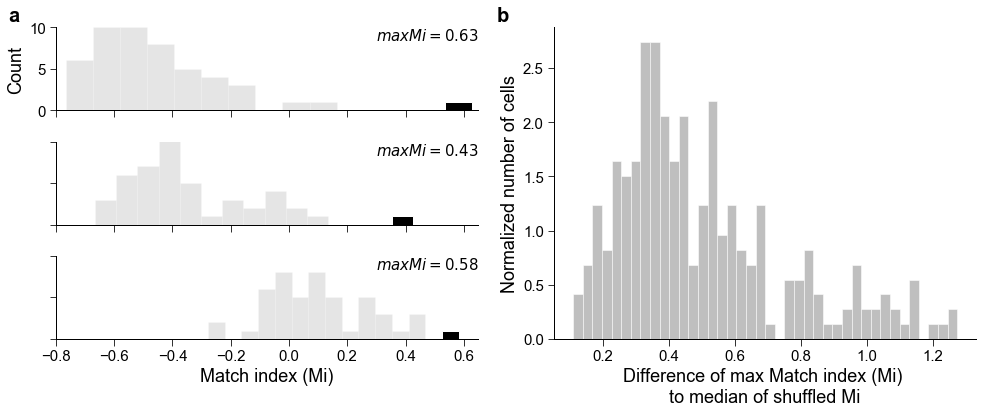

In [193]:

## Get population MI difference
# Get max Mis
max_mis = np.array(g6['maxMi'].values.tolist())
# Get median shuffled Mi
mi_shuffled_median = np.median(mi_shuffled, axis=1)
# Get difference
diff = max_mis - mi_shuffled_median



## Get example cell Mi histograms
# Get max Mis for all cells
max_mis = np.array(g6['maxMi'].values.tolist())

# Get Mi to compare maxMi cluster with (1 = 2nd best)
nth_mi = 1
mis = np.array(g6['mi'].values.tolist())\
    [np.arange(len(g6)), np.array(g6['miSortIdxClu'].values.tolist())[:,nth_mi]]

# Get difference from max Mi
mi_diffs = max_mis - mis

# Find cell with max Mi difference between maxMi vs nth Mi
max_diff_cell = np.where(mi_diffs == np.max(mi_diffs))

# Sort cells according to Mi difference
mi_diff_sort = np.argsort(mi_diffs)[::-1]

# Choose cells to plot
n =  [3, 15, 30] #range(100)
cell_idx = mi_diff_sort[n] # n largest Mi diff cells
cell_idx


### Plotting
# Plot pars
plot_pars = custom_plot_pars()
# plt.set_cmap('viridis') #cmap=plt.get_cmap('viridis')
# cmap = plt.cm.jet(np.linspace(0, 1, len(clus)), alpha=1) # Create actual [n, 4] array of colors
fs = 18 # fontsize
rcParams.update(plot_pars)

# fig, axes = plt.subplots(nrows=len(cell_idx),ncols=1)
rcParams['figure.figsize'] = 14, len(cell_idx)*2
gs = gridspec.GridSpec(len(cell_idx), 4) # Generate nxn grid for plotting figures



## Plot example cells
for i,val in enumerate(cell_idx):
    # Plot histogram of Mis for cell
#     print(i,val)
    ax1 = plt.subplot(gs[i, 0:2])
#     bins = np.linspace(-0.8,0.7,15)
    N, bins, patches = plt.hist(np.squeeze(np.array(g6.mi.values.tolist())[val,:]), 
                     bins=15, alpha=0.2, normed=False, color='grey', edgecolor='white')#, label='Mi$_{0}$ vs Mi$_{%i}$'%val)

    # Adjust axes    
    ax1.set_ylim(0, 10)
    ax1.set_xlim(-0.8, 0.65)
    
    if i == 0:
        plt.ylabel('Count', fontsize=fs)
        txt = plt.title('a', weight='bold')#, loc='left')#ha='right', va='bottom', fontsize=18)
        txt.set_position((-0.1, 1.0))
    if i == len(cell_idx)-1:
        plt.xlabel('Match index (Mi)', fontsize=fs)
    if i != len(cell_idx)-1:
        ax1.tick_params(labelbottom=False)  
    if i != 0:
        ax1.tick_params(labelleft=False)
            
    # Highlight maxMi patch
    patches[-1].set_facecolor('k')
    patches[-1].set_alpha(1)
    plt.text(ax1.get_xlim()[1], ax1.get_ylim()[1], '$maxMi = %.2f$'%g6.maxMi[val], ha='right', va='top')
    
    # Add panel text

    

## Plot Mi diff histogram
ax0 = plt.subplot(gs[0:3, 2:4])
ax0.hist(diff, bins=40, alpha=0.5, normed=True, color='grey', edgecolor='white')

# Plot adjustments
plt.xlabel('Difference of max Match index (Mi) \nto median of shuffled Mi', axes=ax, fontsize=fs)
plt.ylabel('Normalized number of cells', axes=ax, fontsize=fs)
txt = plt.title('b', weight='bold')#, loc='left')#ha='right', va='bottom', fontsize=18)
txt.set_position((-0.12, 1.0))

    
plt.tight_layout()


# Save figure
plt.savefig(p['results_dir']+'mi_summary'+'.png', dpi=300)
plt.savefig(p['results_dir']+'mi_summary'+'.eps')
plt.savefig(p['results_dir']+'mi_summary'+'.pdf')
plt.savefig(p['results_dir']+'mi_summary'+'.svg')

In [186]:
txt.get_position()

(0.5, 1.0)

In [153]:
patches[-1]

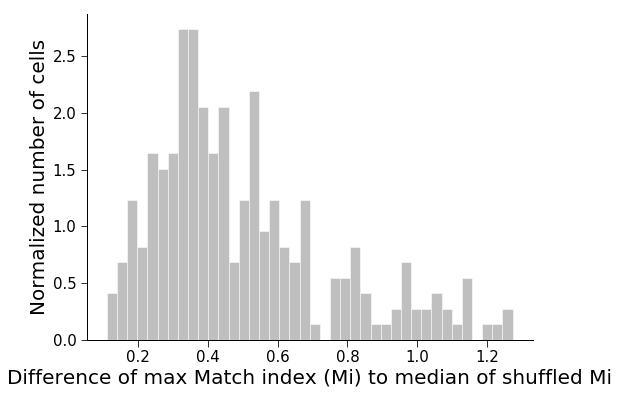

In [10]:
## Plot maxMI vs. median shuffled MIs

# Plot pars
plot_pars = custom_plot_pars()
            
rcParams.update(plot_pars)
fig, ax = plt.subplots()

# Get max Mis
max_mis = np.array(g6['maxMi'].values.tolist())
# Get median shuffled Mi
mi_shuffled_median = np.median(mi_shuffled, axis=1)
# Get difference
diff = max_mis - mi_shuffled_median

# Plot histograms
ax.hist(diff, bins=40, alpha=0.5, normed=True, color='grey', edgecolor='white')

# Plot adjustments
plt.xlabel('Difference of max Match index (Mi) to median of shuffled Mi', axes=ax, fontsize=rcParams['axes.titlesize'])
plt.ylabel('Normalized number of cells', axes=ax, fontsize=rcParams['axes.titlesize'])

plt.show()

In [101]:
sio.whosmat(p['load_dir']+'BadenEtAl_RGCs_2016_ogb1_clu_ogb1Kern_7.8Hz.mat')

[('chirpMean', (249, 49), 'double'),
 ('barDeconvMean', (32, 49), 'double'),
 ('barMeanDeconv', (32, 49), 'double'),
 ('barTime', (1, 32), 'double'),
 ('somaSizeIdx', (49, 1), 'int64'),
 ('barN', (1, 49), 'int64'),
 ('chirpDeconvSd', (249, 49), 'double'),
 ('barMed', (32, 49), 'double'),
 ('barDeconvSd', (32, 49), 'double'),
 ('dsIdx', (49, 1), 'int64'),
 ('chirpMeanDeconv', (249, 49), 'double'),
 ('chirpN', (1, 49), 'int64'),
 ('chirpDeconvMean', (249, 49), 'double'),
 ('chirpTime', (1, 249), 'double'),
 ('barSd', (32, 49), 'double'),
 ('chirpMed', (249, 49), 'double'),
 ('barMean', (32, 49), 'double'),
 ('chirpSd', (249, 49), 'double')]

In [95]:
g6.head()

,chirpDeconvMean,chirpDeconvSd,chirpDeconvTraces,chirpMean,chirpMed,chirpQi,chirpSd,chirpTraces,date,field,...,barCorrSortIdx,chirpMaxCorrs,barMaxCorrs,mi,miSortIdxClu,maxMi,miTotCellSortIdx,cluIdx,groupIdx,groupID
0,"[0.182614715746, 0.116743502721, 0.28316401370...","[0.302011176476, 0.186499065661, 0.51234073060...","[[0.307347520304, -0.040183597133, 0.922208806...","[-0.0128713834029, -0.0701261534049, 0.0316880...","[-0.0055380478445, 0.00327161255789, 0.0046195...",0.211864,"[0.0893408663753, 0.133742229913, 0.1877135966...","[[-0.0055380478445, -0.173031743708, 0.2079987...",20160421,02,...,"[5, 4, 3, 2, 12, 11, 1, 6, 7, 46, 0, 19, 8, 14...",0.319494,0.814407,"[0.544409792573, 0.570233410581, 0.57334394738...","[5, 4, 3, 12, 2, 1, 11, 0, 6, 7, 46, 8, 19, 9,...",0.648228,102,5,4,OFF alpha sust.
1,"[0.395936570383, 0.484333335227, 0.36619875319...","[0.461526717202, 0.392324339998, 0.24295881311...","[[-0.0427311664374, 0.297276886923, 0.28766548...","[-0.0783298482677, 0.0479358267538, -0.0064009...","[-0.277485269658, -0.0353581361838, 0.05130186...",0.227458,"[0.313383878213, 0.282260583339, 0.26402579560...","[[-0.428683834757, 0.27982536097, 0.5339159519...",20160421,05,...,"[24, 25, 21, 20, 26, 22, 27, 39, 13, 28, 29, 3...",0.099745,0.598358,"[-0.0576079147626, -0.0408989654682, -0.111038...","[21, 25, 24, 26, 27, 20, 22, 28, 39, 29, 13, 3...",0.468846,199,21,15,ON DS trans.
2,"[0.122236683075, 0.0945549007402, 0.0808013954...","[0.0608752624143, 0.0557781937903, 0.037605802...","[[0.0896329891682, 0.12281087181, 0.0762538680...","[0.0283608752041, 0.0193459166529, 0.007544470...","[0.00577323761667, 0.01094808481, 0.0114910636...",0.456170,"[0.0481080506676, 0.026399595447, 0.0327665772...","[[0.00577323761667, 0.0387059296714, 0.0114910...",20160421,05,...,"[9, 10, 19, 15, 14, 0, 16, 8, 11, 12, 1, 17, 6...",0.684494,0.901579,"[0.768176586964, 0.772951552187, 0.63106760070...","[1, 0, 9, 12, 10, 19, 11, 16, 14, 15, 17, 8, 2...",0.772952,27,1,1,OFF DS
3,"[0.242954470837, 0.267869409971, 0.26737713004...","[0.379771023111, 0.268041602557, 0.42118392915...","[[0.875277398854, 0.0720089240492, -0.12034829...","[-0.284194529373, -0.289431515546, -0.29011844...","[0.00378478493363, -0.113673823443, -0.2722623...",0.440871,"[0.739194895605, 0.3732969897, 0.276251460654,...","[[0.328532088453, -0.113673823443, -0.42387452...",20160421,05,...,"[47, 48, 46, 5, 3, 4, 7, 38, 6, 2, 37, 27, 28,...",0.611384,0.820837,"[-0.488613757645, -0.509158046369, -0.31544263...","[47, 48, 46, 5, 3, 45, 38, 4, 2, 42, 37, 41, 4...",0.741118,39,47,31,OFF suppr. 2
4,"[0.511943758297, 0.30111678947, 0.421022640162...","[0.330802736146, 0.153093080913, 0.19764728626...","[[0.613555646733, 0.599308152433, 0.4597155645...","[0.16869152162, 0.0250442959601, 0.11692367081...","[0.262316657829, -0.0569183318512, 0.207522724...",0.414688,"[0.411126253043, 0.31175320296, 0.224346218133...","[[0.36056425394, 0.506663426594, 0.44693488025...",20160421,05,...,"[25, 27, 26, 24, 28, 20, 21, 22, 29, 39, 23, 3...",0.479891,0.823743,"[-0.322148719009, -0.247481528969, -0.30262894...","[25, 27, 26, 28, 20, 24, 22, 21, 29, 39, 34, 1...",0.704824,66,25,17,ON trans.
